In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris=datasets.load_iris()

In [ ]:
X=iris.data[:,[2,3]]

In [ ]:
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit(X_train)

In [ ]:
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
X_train_std.shape
X_test_std.shape

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
ppn = Perceptron(eta0=0.1 , random_state=1)

ppn.fit(X_train,y_train)

In [ ]:
y_pred = ppn.predict(X_test_std)

In [ ]:
X_test_std

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
ppn.score(X_test_std,y_test)

In [ ]:
from matplotlib.colors import Colormap
import matplotlib.pyplot as plt

In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
lr = LogisticRegression(C=100.0 , random_state=1 , solver='lbfgs' , multi_class='ovr')

In [ ]:
lr.fit(X_train_std,y_train)

In [40]:
from matplotlib.colors import ListedColormap

In [41]:
def plot_decision_regions(X, y, classifier, test_idx=None,
resolution=0.02):
    
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=colors[idx],
        marker=markers[idx], label=cl,
        edgecolor='black')
    # highlight test examples
    if test_idx:
        
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='test set')

In [42]:
plot_decision_regions(X=X_train, y=y_train, classifier=lr,test_idx=range(104, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
lr.predict_prob(X_test_std).argmax(axis=1)

In [ ]:
lr.predict(X_test_std)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC( kernel='linear' , C=1.0 , random_state=1 )

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
plot_decision_regions(X=X_train, y=y_train, classifier=svm,test_idx=range(0, 45))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
svm.predict([[7.3,1.0]])

# Football Predictor

In [27]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv("results.csv")

In [29]:
x=[]

for h,a in data.iterrows():
    
    if a['home_score'] > a['away_score']:
            x.append(1)
            
    elif a['home_score'] < a['away_score']:
            
            x.append(0)
    else:
        x.append(2)          

In [30]:
data=data.rename(columns={'date':'result'})

data

,result,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


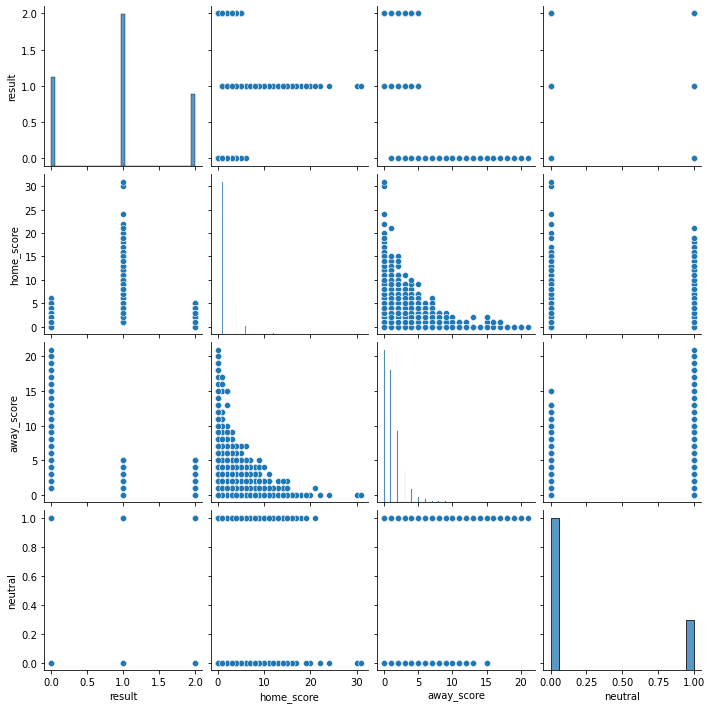

In [31]:
data['result']=x

import seaborn as sns


sns.pairplot(data)

In [32]:
data=data.loc[:,['result', 'home_team' , 'away_team' , 'home_score' , 'away_score' , 'country']]

In [33]:
array=data.loc[:,'home_team'].unique().copy()

In [34]:
d1 = dict(enumerate(array.flatten(), 1))

In [35]:
d={key : value for (value,key) in d1.items()}

In [36]:
 data['home_team']=data['home_team'].map(d).values

In [37]:
 data['away_team']=data['away_team'].map(d).values

In [38]:
data['country']=data['country'].map(d).values

In [39]:
data



,result,home_team,away_team,home_score,away_score,country
0,2,1,2.0,0,0,1.0
1,1,2,1.0,4,2,2.0
2,1,1,2.0,2,1,1.0
3,2,2,1.0,2,2,2.0
4,1,1,2.0,3,0,1.0
...,...,...,...,...,...,...
42079,0,238,8.0,1,4,238.0
42080,0,216,88.0,0,2,216.0
42081,1,227,38.0,3,2,227.0
42082,0,16,232.0,1,2,16.0


In [74]:
mean_home_team = data['home_team'].mean()
mean_away_team = data['away_team'].mean()
mean_country = data['country'].mean()
mean_score = data['goal_diff'].mean()


data['home_team'] = data['home_team'].fillna(mean_home_team)
data['away_team'] = data['away_team'].fillna(mean_away_team)
data['country'] = data['country'].fillna(mean_country)
data['goal_diff'] = data['goal_diff'].fillna(mean_score)

In [75]:

data['home_score'] = data['home_score']-data['away_score']


data=data.rename(columns={'home_score':'goal_diff'})



KeyError: 'home_score'

In [47]:
data['away_score'] = data['away_score'].values.astype('float')

In [48]:
from sklearn.model_selection import train_test_split

In [76]:
X= data.loc[:,['home_team','away_team','country']].values.copy()
y= data['goal_diff'].values.copy()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

In [51]:
print(model.feature_importances_)

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [52]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X[:])
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

In [56]:
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [57]:
#from sklearn.svm import SVC

In [58]:
#svm = SVC(kernel='linear' , C=1.0 , random_state=1)

In [59]:
#svm.fit(X_train[:100],y_train[:100])

In [60]:
X_train_std

array([[-0.18101028, -0.5077157 , -0.10841528],
       [-0.98968809, -1.05882258, -0.94089736],
       [ 0.62766752,  1.11659932,  0.72406679],
       ...,
       [-1.04850102, -1.04431977, -1.00144151],
       [ 0.92173218,  0.08689962,  0.99651547],
       [-1.09261072, -1.24735915, -1.04684962]])

In [61]:
d

{'Scotland': 1,
 'England': 2,
 'Wales': 3,
 'Northern Ireland': 4,
 'United States': 5,
 'Uruguay': 6,
 'Austria': 7,
 'Hungary': 8,
 'Argentina': 9,
 'Belgium': 10,
 'France': 11,
 'Netherlands': 12,
 'Czechoslovakia': 13,
 'Switzerland': 14,
 'Sweden': 15,
 'Germany': 16,
 'Italy': 17,
 'Chile': 18,
 'Norway': 19,
 'Finland': 20,
 'Luxembourg': 21,
 'Russia': 22,
 'Denmark': 23,
 'Catalonia': 24,
 'Basque Country': 25,
 'Brazil': 26,
 'Japan': 27,
 'Paraguay': 28,
 'Canada': 29,
 'Estonia': 30,
 'Costa Rica': 31,
 'Guatemala': 32,
 'Spain': 33,
 'Brittany': 34,
 'Poland': 35,
 'Yugoslavia': 36,
 'New Zealand': 37,
 'Romania': 38,
 'Latvia': 39,
 'Galicia': 40,
 'Portugal': 41,
 'Andalusia': 42,
 'China PR': 43,
 'Australia': 44,
 'Lithuania': 45,
 'Turkey': 46,
 'Central Spain': 47,
 'Mexico': 48,
 'Aruba': 49,
 'Egypt': 50,
 'Haiti': 51,
 'Philippines': 52,
 'Bulgaria': 53,
 'Jamaica': 54,
 'Kenya': 55,
 'Bolivia': 56,
 'Peru': 57,
 'Honduras': 58,
 'Guyana': 59,
 'Uganda': 60,
 'B

In [62]:
x1 = np.array([[14,20,14]])

In [63]:
x1_std = sc.transform(x1)
x1_std

array([[-1.11268635, -1.04020878, -1.06259138]])

In [151]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0 , random_state=1 , solver='sag' , multi_class='ovr')

In [92]:
lr.fit(X_train_std,y_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='ovr', random_state=1, solver='sag')

In [94]:
lr.predict_proba(x1_std).argmax()

20

In [95]:
#plot_decision_regions(X=X_train_std, y=y_train, classifier=lr,test_idx=range(1, 10))
#plt.tight_layout()
#plt.show()

X_train_std

array([[-0.18101028, -0.50789495, -0.10932869],
       [-0.98968809, -1.05919838, -0.94943115],
       [ 0.62766752,  1.11699935,  0.73077376],
       ...,
       [-1.04850102, -1.04469039, -1.01052951],
       [ 0.92173218,  0.08693242,  1.00571639],
       [-1.09261072, -1.24780218, -1.05635328]])

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
reg = LinearRegression()

In [104]:
reg.fit(X_train_std,y_train)

LinearRegression()

In [105]:
reg.predict(x1_std)

array([0.41388868])

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
regressor = RandomForestRegressor

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


In [71]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [72]:
rf_random.fit(X_train_std,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\abhin\anaconda3\lib\site-packages\sklearn\utils\validation.py"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [73]:
#South africa vs Germany in SA
#Goal difference with respect to home team (SA in this example)
#In simpler words Germany wins
rf_random.predict(x1_std)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [138]:
pred = rf_random.predict(X_test_std)

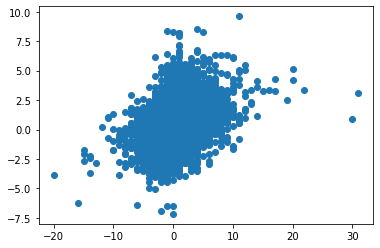

In [139]:
plt.scatter(y_test,pred)

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

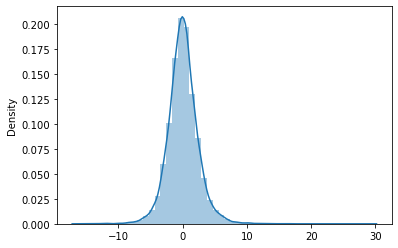

In [140]:
sns.distplot(y_test-pred)

In [154]:
rf_random.score(X_test_std,y_test)

-5.6184449635134115

In [155]:
print('Test Accuracy : %0.2f' % rf_random.score(X_test_std,y_test))

Test Accuracy : -5.62


# Web Scraping #

In [1]:
import requests , bs4

In [2]:
result = requests.get('https://www.flipkart.com/gargi-pods-12-bluetooth-headset/product-reviews/itmdf0308e3b3de4?pid=ACCFXDK4EH2KDBZZ&lid=LSTACCFXDK4EH2KDBZZKCROQ9&marketplace=FLIPKART')

In [3]:
soup = bs4.BeautifulSoup(result.text,'lxml')

In [4]:
result.status_code

200

In [5]:
soup.select('._27M-vq')[0] .getText()

'5AwesomeVery good quality 👍🏻👍🏻👍🏻READ MOREFlipkart CustomerCertified Buyer, Jammu4 months ago4813PermalinkReport Abuse'

In [6]:
from textblob import TextBlob

In [7]:
blob = TextBlob(soup.select('._27M-vq')[0] .getText())

In [8]:
blob.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [9]:
soup.select('title')[0].getText()

'Gargi Pods 12 Bluetooth Headset Reviews: Latest Review of Gargi Pods 12 Bluetooth Headset | Price in India | Flipkart.com'

In [10]:
#search_for = input()

In [11]:
search_for = 'iphone'

In [12]:
search_url = 'https://www.flipkart.com/search?q='+ search_for.replace(' ','+')

In [13]:
search_url

'https://www.flipkart.com/search?q=iphone'

In [14]:
main = requests.get(search_url)

In [15]:
soup_main = bs4.BeautifulSoup(main.text,'lxml')

In [16]:
#x=soup_main.select('._13oc-S')

In [17]:
product_list = []

for x in soup_main.select('._13oc-S'):
    

    for p in x.select('a'):
        product_list.append('https://www.flipkart.com'+p['href']) 
        

set1 = set(product_list)
product_list = list(set1)
       

In [18]:
comm = []
comment_url = []
for product_url in product_list:
    product_res = requests.get(product_url)
    
    soup_product = bs4.BeautifulSoup(product_res.text,'lxml')
    
    
 # ._2c2kv- is class for individual products 
    #print(soup_product.select('title')[0].getText())
    
    
    x2 = soup_product.find(class_='col JOpGWq')
    x3 = x2.find_all('a')[-1]
    final_link = 'https://www.flipkart.com'+x3['href']    
    comment_url.append(final_link)
        
        
        
for ur in comment_url:
    temp_com=[]
    
    final_res = requests.get(ur)
    final_comments_soup = bs4.BeautifulSoup(final_res.text,'lxml')
    
    for alp in final_comments_soup.select('.t-ZTKy'):
        temp_com.append(alp.getText())
            
    comm.append(temp_com)
    
    del temp_com
    

In [22]:
from textblob import TextBlob 

for sen1 in comm:
    for sen in sen1:
        #print(sen)
        blob = TextBlob(sen)
        print(blob.sentiment)

Sentiment(polarity=0.6909090909090909, subjectivity=0.6590909090909091)
Sentiment(polarity=0.27222222222222225, subjectivity=0.5905555555555556)
Sentiment(polarity=0.4333333333333333, subjectivity=0.42666666666666664)
Sentiment(polarity=0.23130050505050506, subjectivity=0.7000378787878788)
Sentiment(polarity=0.32999999999999996, subjectivity=0.39)
Sentiment(polarity=0.30178571428571427, subjectivity=0.5857142857142856)
Sentiment(polarity=0.265, subjectivity=0.53)
Sentiment(polarity=0.20897435897435898, subjectivity=0.5076923076923078)
Sentiment(polarity=0.4005555555555556, subjectivity=0.6661111111111112)
Sentiment(polarity=0.5266666666666666, subjectivity=0.63)
Sentiment(polarity=0.673469387755102, subjectivity=0.7418367346938776)
Sentiment(polarity=0.5434027777777778, subjectivity=0.49583333333333335)
Sentiment(polarity=0.37083333333333335, subjectivity=0.7708333333333334)
Sentiment(polarity=0.5960000000000001, subjectivity=0.67)
Sentiment(polarity=0.5857142857142857, subjectivity=0.

In [21]:
comm

[['Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7. Red colour looks superb.8. Portrait mode photography is Superb.READ MORE',
  'This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My purchase point was its size. If you are looking for the same you won’t be disappointed. I strongly recommend this phone to people who is more work oriented. Game loves should skip this phone as this is not a game phone. Best features with stunning looks & performance. Battery life is very good...READ MORE',
  'Who all loves older size i.e., 4.7 inch type should definitely go for this.  Nothing is better than XR, XS or 11. Best for price and usage.READ MORE',
  'Mobile is very handy. Packed with good performances and ni

In [5]:
from transformers import AutoTokenizer 

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [4]:
!pip install transformers

  Using cached transformers-4.6.1-py3-none-any.whl (2.2 MB)
  Using cached sacremoses-0.0.45-py3-none-any.whl (895 kB)
  Using cached huggingface_hub-0.0.8-py3-none-any.whl (34 kB)
